In [75]:
import sys
sys.path.append("..")
import pickle as pkl
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from coh_tools import *

In [83]:
# Set lotting defaults
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['figure.figsize'] = [8, 5]

In [77]:
# Get experiment info
os.chdir("/media/julien/hdd2tb/lab/elife/data")
experiments = pd.read_csv('table_of_experiments.csv')
paired_stim_experiments = experiments.loc[experiments["Number of Lasers during Conditioning"] == 2]
paired_stim_experiments = paired_stim_experiments.loc[experiments["stim_Coh_from"] != 0]

In [78]:
paired_stim_experiments.head()

Experiment   Monkey  YYYYMMDD   Session PREAMP  \
0  Experiment1  MonkeyG  20150908  Session2     M1   
1  Experiment2  MonkeyG  20150908  Session3     M1   
2  Experiment3  MonkeyG  20150908  Session4     M1   
3  Experiment4  MonkeyG  20150909  Session2     M1   
4  Experiment5  MonkeyG  20150909  Session3     M1   

                          File Name  stim_Coh_from  stim_Coh_to  \
0  MonkeyG_20150908_Session2_M1.zip             46           63   
1  MonkeyG_20150908_Session3_M1.zip             48           43   
2  MonkeyG_20150908_Session4_M1.zip             48           16   
3  MonkeyG_20150909_Session2_M1.zip             48           12   
4  MonkeyG_20150909_Session3_M1.zip             53           27   

   Number of Lasers in Experiment  Number of Lasers during Conditioning Delay  \
0                               2                                     2  10ms   
1                               2                                     2  10ms   
2                               2                                     2  10ms   
3                               2                                     2  10ms   
4                               2                                     2  10ms   

                                            m1_sites  \
0  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   
1  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   
2  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   
3  1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,2,4...   
4  1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,2,4...   

                                            s1_sites  
0  50,52,54,56,57,58,59,60,61,62,63,64,65,66,67,6...  
1  50,52,54,56,57,58,59,60,61,62,63,64,65,66,67,6...  
2  50,52,54,56,57,58,59,60,61,62,63,64,65,66,67,6...  
3  10,33,34,35,36,37,54,56,57,58,59,60,61,62,63,6...  
4  10,33,34,35,36,37,54,56,57,58,59,60,61,62,63,6...

In [79]:
# Navigate to directory with pickled data
os.chdir("/media/julien/hdd2tb/lab/elife/data/pickled")

In [80]:
# Load relevant data
base_stdp_cohs = pkl.load(open("base_stdp_cohs.pkl", "rb"))
base_stdp_phis = pkl.load(open("base_stdp_phis.pkl", "rb"))
stim_stdp_cohs = pkl.load(open("stim_stdp_cohs.pkl", "rb"))
stim_stdp_phis = pkl.load(open("stim_stdp_phis.pkl", "rb"))
freqs = pkl.load(open("freqs_stdp.pkl", "rb"))

### Coherence STDP Plot with Phase Information, for single frequencies:

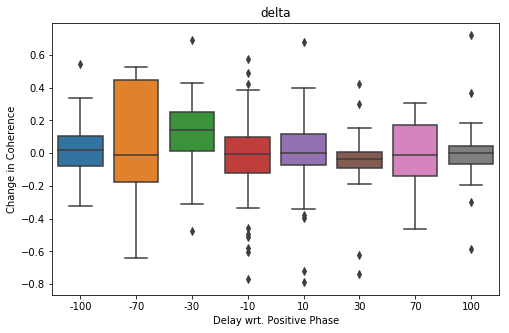

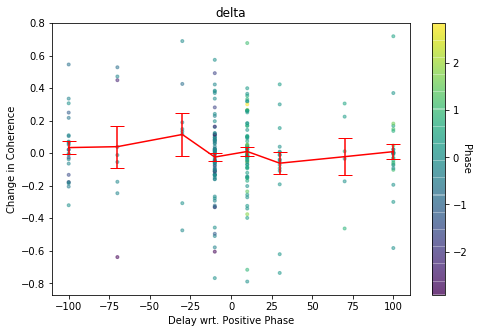

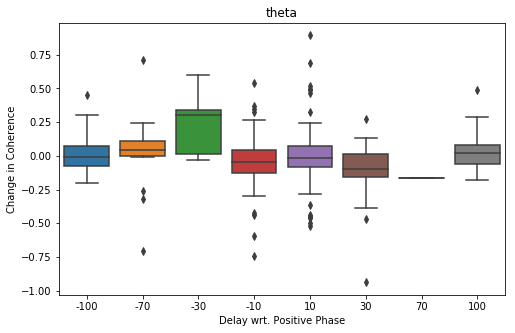

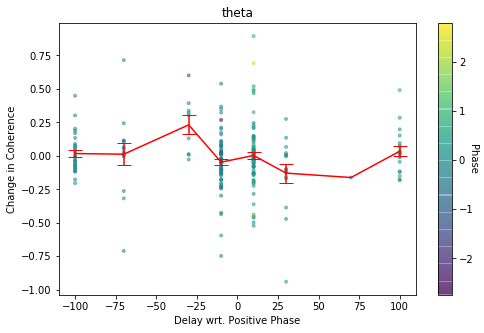

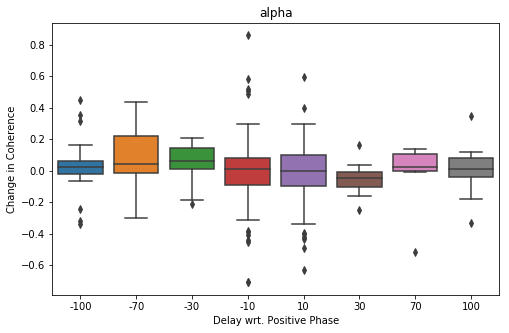

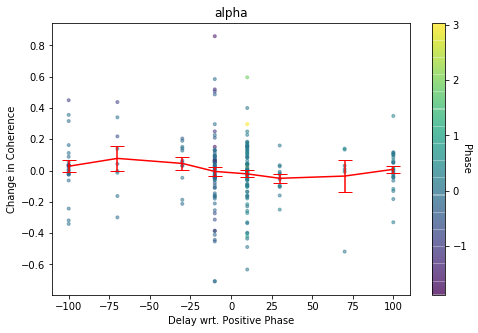

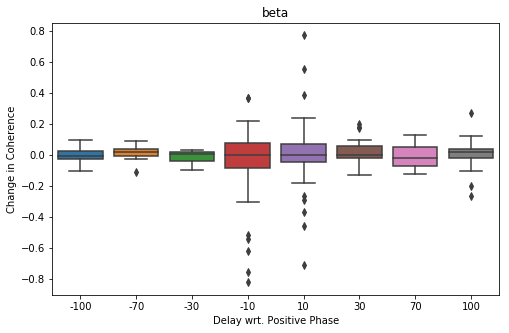

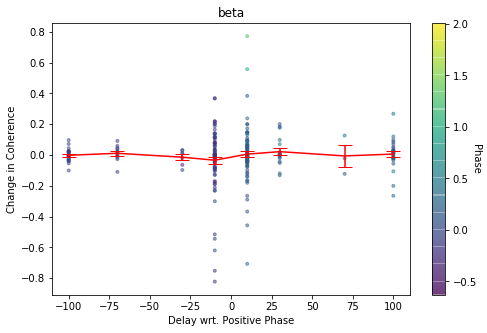

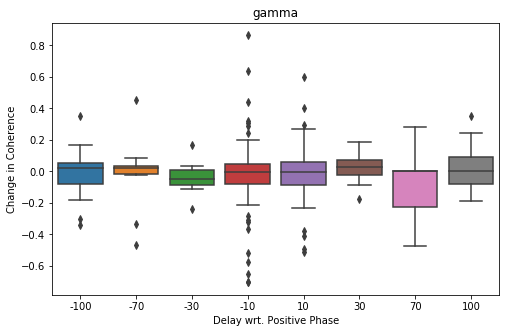

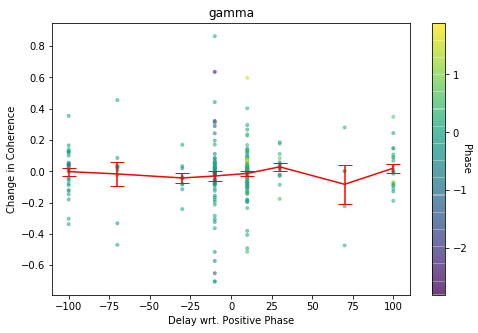

In [7]:
for band in ['delta', 'theta', 'alpha', 'beta', 'gamma']:
    low_f, high_f = get_band_range(band)
    low_f_index, high_f_index = get_freq_band_indices(freqs, low_f, high_f)
    single_f = int((low_f_index + high_f_index)/2)
    xs = []
    ys = []
    cs = []
    for session in base_stdp_cohs.keys():
        delay = int(paired_stim_experiments[paired_stim_experiments['File Name'].str
                                            .contains(session)].Delay.to_string()[-5:-2])
        coh_changes = np.diff(base_stdp_cohs[session][:, single_f])
        phis = base_stdp_phis[session][:-1, single_f]
        for phis_i in range(len(phis)):
            if phis[phis_i] >= 0:
                xs.append(delay)
                ys.append(coh_changes[phis_i])
                cs.append(phis[phis_i])
            else:
                xs.append(-delay)
                ys.append(coh_changes[phis_i])
                cs.append(phis[phis_i])
    df = pd.DataFrame(list(zip(xs, ys)))
    
    # Boxplot
    sns.boxplot(x=0, y=1, data=df)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()
    
    # Scatter plot of all data and mean, with phase colormap
    plt.scatter(xs, ys, c=cs, s=9, alpha=.5)
    plt.colorbar().set_label('Phase', rotation=270)
    plt.errorbar(df.groupby(0)[0].mean(), df.groupby(0)[1].mean(), yerr=df.groupby(0).sem()[1],
                 c="red", capsize=7)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()

### Coherence STDP Plot with Phase Information, for frequency bands:

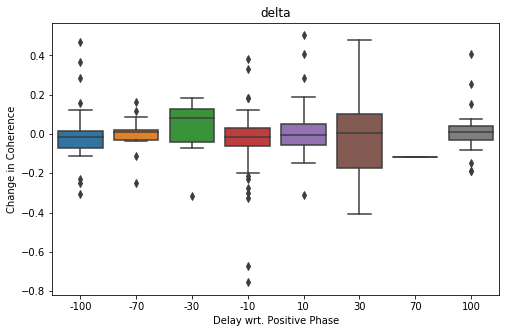

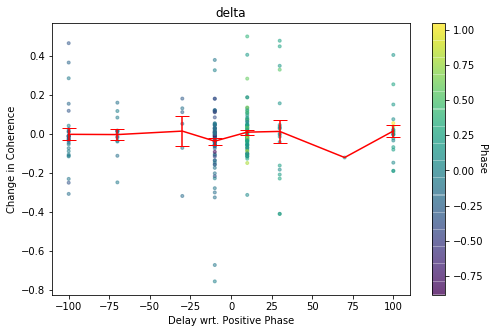

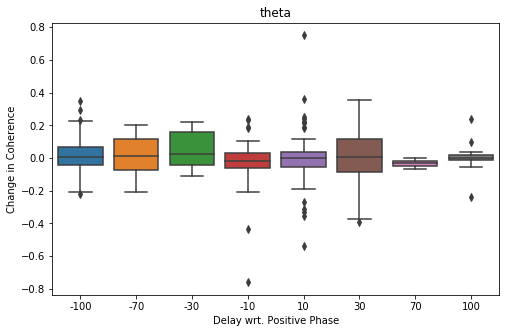

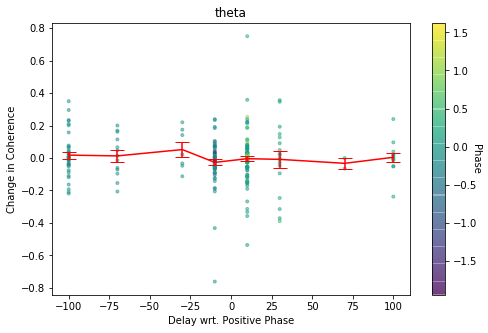

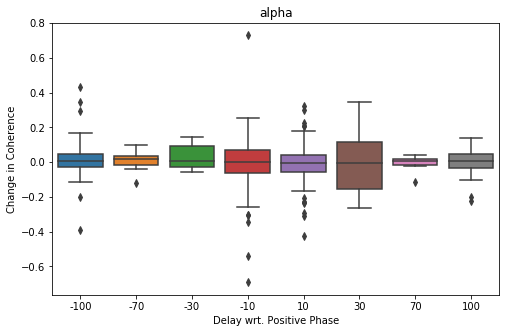

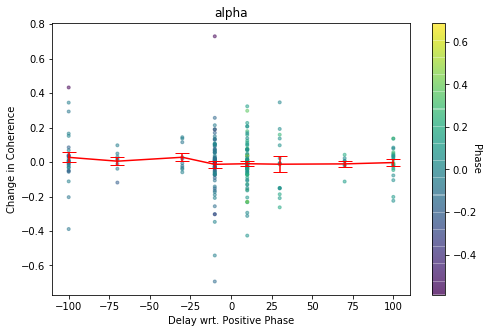

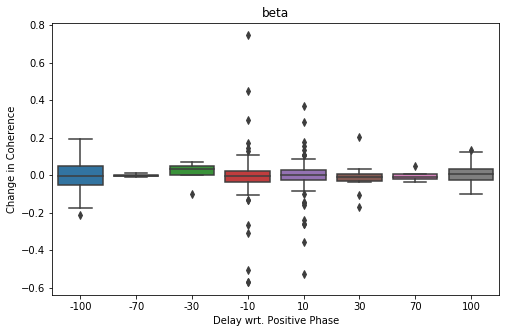

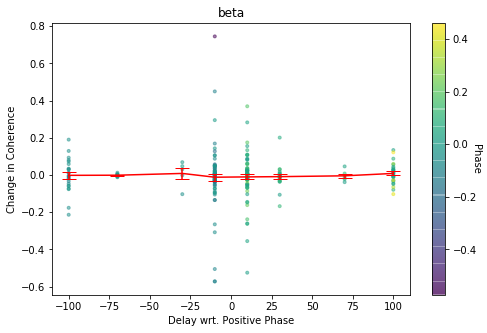

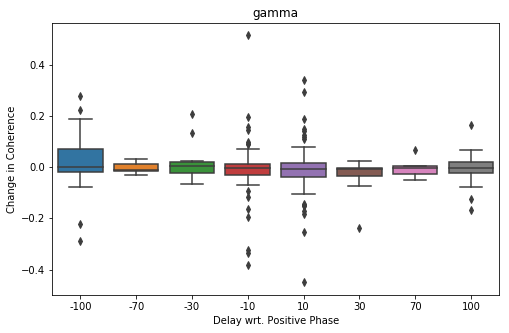

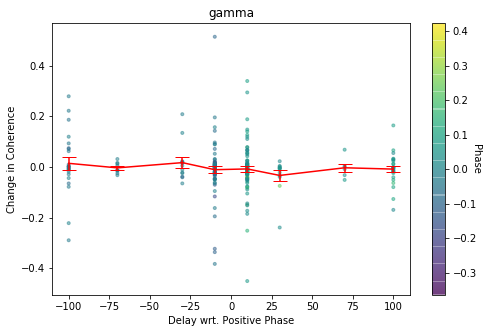

In [8]:
for band in ['delta', 'theta', 'alpha', 'beta', 'gamma']:
    low_f, high_f = get_band_range(band)
    low_f_index, high_f_index = get_freq_band_indices(freqs, low_f, high_f)
    xs = []
    ys = []
    cs = []
    for session in base_stdp_cohs.keys():
        delay = int(paired_stim_experiments[paired_stim_experiments['File Name'].str
                                            .contains(session)].Delay.to_string()[-5:-2])
        coh_changes = np.diff(base_stdp_cohs[session][:, low_f_index:high_f_index].mean(1))
        phis = base_stdp_phis[session][:-1, low_f_index:high_f_index].mean(1)
        for phis_i in range(len(phis)):
            if phis[phis_i] >= 0:
                xs.append(delay)
                ys.append(coh_changes[phis_i])
                cs.append(phis[phis_i])
            else:
                xs.append(-delay)
                ys.append(coh_changes[phis_i])
                cs.append(phis[phis_i])
    df = pd.DataFrame(list(zip(xs, ys)))

    # Boxplot
    sns.boxplot(x=0, y=1, data=df)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()
    
    # Scatter plot of all data and mean, with phase colormap
    plt.scatter(xs, ys, c=cs, s=9, alpha=.5)
    plt.colorbar().set_label('Phase', rotation=270)
    plt.errorbar(df.groupby(0)[0].mean(), df.groupby(0)[1].mean(), yerr=df.groupby(0).sem()[1],
                 c="red", capsize=7)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()

### Coherence STDP Plot with abs(delay), for frequency bands:

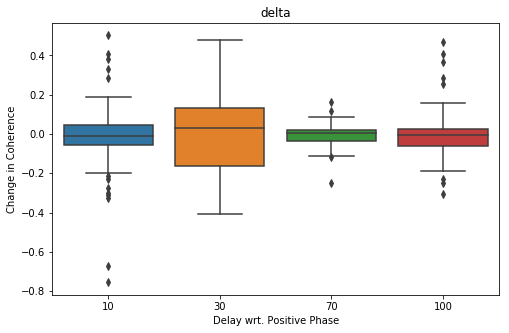

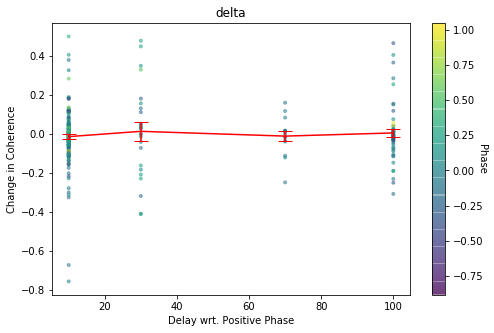

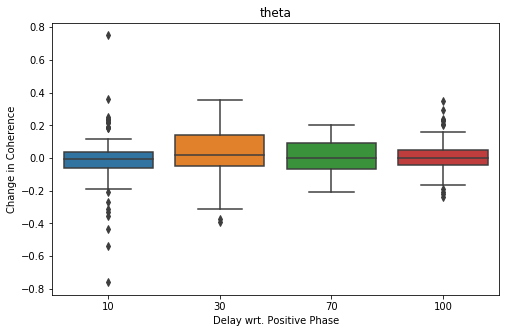

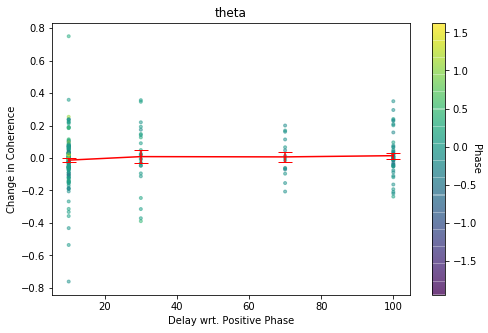

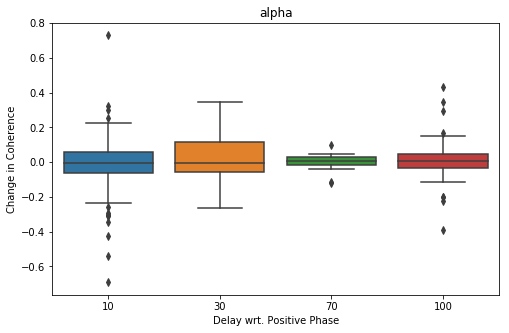

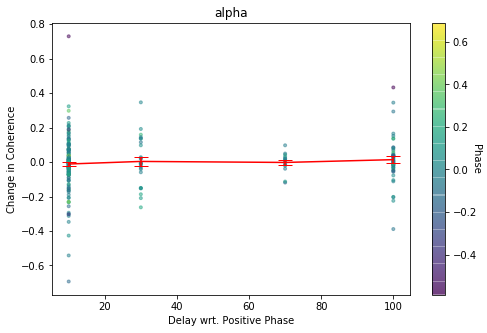

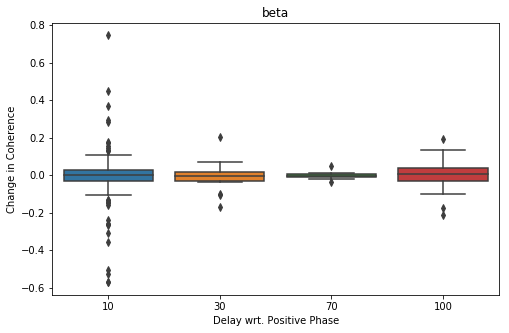

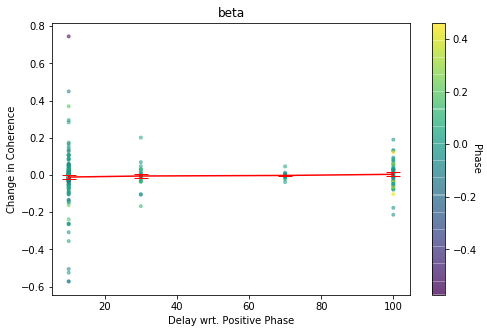

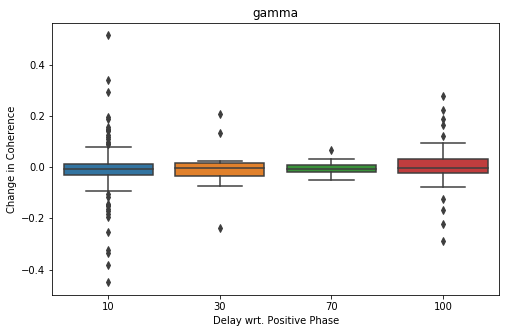

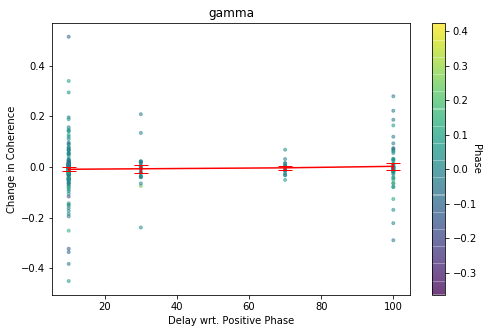

In [9]:
for band in ['delta', 'theta', 'alpha', 'beta', 'gamma']:
    low_f, high_f = get_band_range(band)
    low_f_index, high_f_index = get_freq_band_indices(freqs, low_f, high_f)
    xs = []
    ys = []
    cs = []
    for session in base_stdp_cohs.keys():
        delay = int(paired_stim_experiments[paired_stim_experiments['File Name'].str
                                            .contains(session)].Delay.to_string()[-5:-2])
        coh_changes = np.diff(base_stdp_cohs[session][:, low_f_index:high_f_index].mean(1))
        phis = base_stdp_phis[session][:-1, low_f_index:high_f_index].mean(1)
        for phis_i in range(len(phis)):
            xs.append(delay)
            ys.append(coh_changes[phis_i])
            cs.append(phis[phis_i])
    df = pd.DataFrame(list(zip(xs, ys)))

    # Boxplot
    sns.boxplot(x=0, y=1, data=df)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()
    
    # Scatter plot of all data and mean, with phase colormap
    plt.scatter(xs, ys, c=cs, s=9, alpha=.5)
    plt.colorbar().set_label('Phase', rotation=270)
    plt.errorbar(df.groupby(0)[0].mean(), df.groupby(0)[1].mean(), yerr=df.groupby(0).sem()[1],
                 c="red", capsize=7)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()

# Working on this:

### Coherence STDP Plot with abs(delay) and abs(change in coh), for frequency bands, but only comparing beginning and end:

In [27]:
paired_stim_experiments.loc[experiments["Delay"] == "70ms"]

Experiment   Monkey  YYYYMMDD   Session PREAMP  \
6  Experiment7  MonkeyG  20150909  Session5     M1   
7  Experiment8  MonkeyG  20150910  Session3     S1   
8  Experiment9  MonkeyG  20150910  Session4     S1   

                          File Name  stim_Coh_from  stim_Coh_to  \
6  MonkeyG_20150909_Session5_M1.zip             14           55   
7  MonkeyG_20150910_Session3_S1.zip             36           42   
8  MonkeyG_20150910_Session4_S1.zip              8            4   

   Number of Lasers in Experiment  Number of Lasers during Conditioning Delay  \
6                               2                                     2  70ms   
7                               2                                     2  70ms   
8                               2                                     2  70ms   

                                            m1_sites  \
6  1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,2,4...   
7  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   
8  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   

                                            s1_sites  
6  10,33,34,35,36,37,54,56,57,58,59,60,61,62,63,6...  
7  50,52,54,56,57,58,59,60,61,62,63,64,66,68,70,7...  
8  50,52,54,56,57,58,59,60,61,62,63,64,66,68,70,7...

In [58]:
base_stdp_cohs[session][5, low_f_index:high_f_index].mean() - base_stdp_cohs[session][0, low_f_index:high_f_index].mean()

-0.018713384641860842

In [53]:
base_stdp_cohs[session][0, low_f_index:high_f_index].mean()

0.195003771921655

In [69]:
np.diff(base_stdp_cohs[session][[0, -1], low_f_index:high_f_index], axis=0).mean()


-0.018713384641860866

In [72]:
np.diff(base_stdp_cohs[session][[0, -1], low_f_index:high_f_index].mean(1))


array([-0.01871338])

MonkeyG_20150909_Session5
0.2108882010736154

MonkeyG_20150910_Session3
-0.15500025347706303

MonkeyG_20150910_Session4
0.05039267890214405



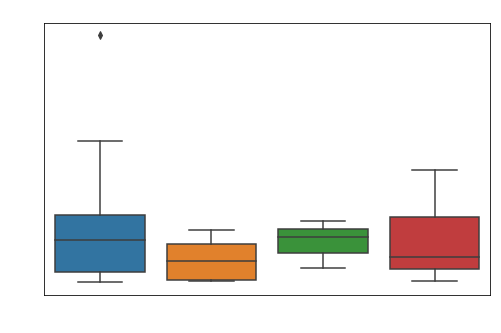

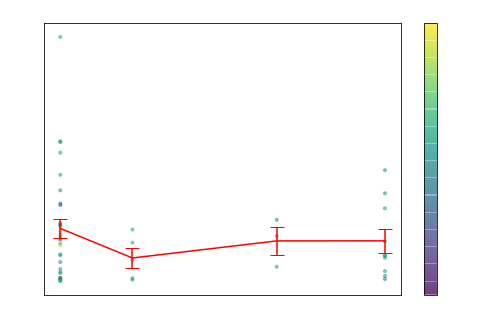

In [84]:
for band in ['theta']: #['delta', 'theta', 'alpha', 'beta', 'gamma']:
    low_f, high_f = get_band_range(band)
    low_f_index, high_f_index = get_freq_band_indices(freqs, low_f, high_f)
    xs = []
    ys = []
    cs = []
    for session in base_stdp_cohs.keys():
        delay = int(paired_stim_experiments[paired_stim_experiments['File Name'].str
                                            .contains(session)].Delay.to_string()[-5:-2])
        coh_changes = np.diff(base_stdp_cohs[session][[0, -1], low_f_index:high_f_index].mean(1))
        phi = base_stdp_phis[session][0, low_f_index:high_f_index].mean(0)
        xs.append(delay)
        ys.append(abs(coh_changes[phis_i]))
        cs.append(phi)

        if delay == 70:
            print(session)
            print(coh_changes[0])
            print()
                
    df = pd.DataFrame(list(zip(xs, ys)))

    # Boxplot
    sns.boxplot(x=0, y=1, data=df)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()
    
    # Scatter plot of all data and mean, with phase colormap
    plt.scatter(xs, ys, c=cs, s=9, alpha=.5)
    plt.colorbar().set_label('Phase', rotation=270)
    plt.errorbar(df.groupby(0)[0].mean(), df.groupby(0)[1].mean(), yerr=df.groupby(0).sem()[1],
                 c="red", capsize=7)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()

In [42]:
(-0.15500025347706303 + 0.05039267890214405)/2

-0.05230378728745949

In [45]:
(.1065 + .0508 + .05103)/3

0.06944333333333333

### Coherence STDP Plot with abs(delay) and abs(change in coh), for frequency bands:

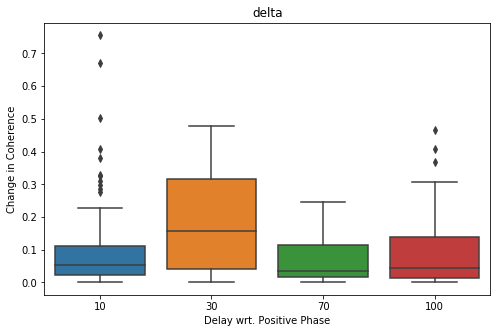

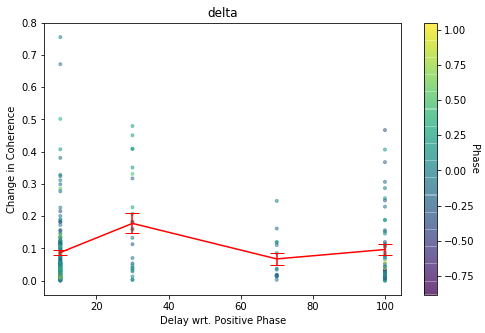

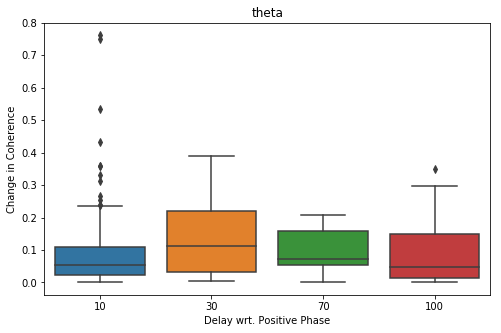

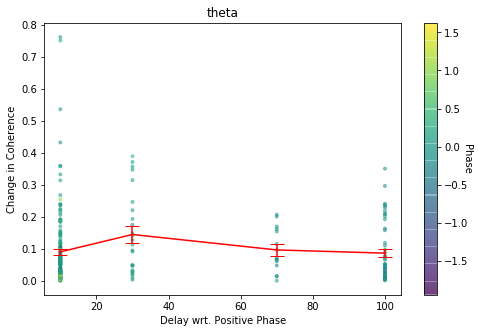

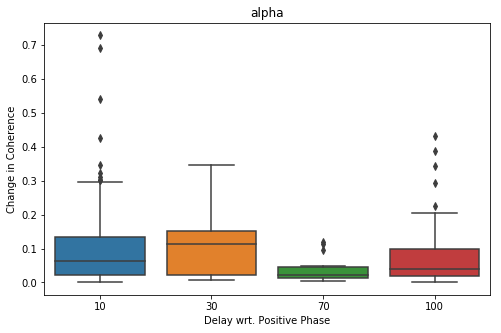

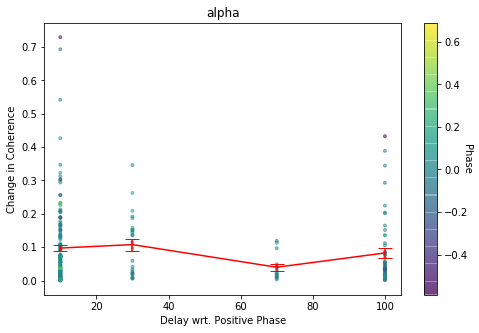

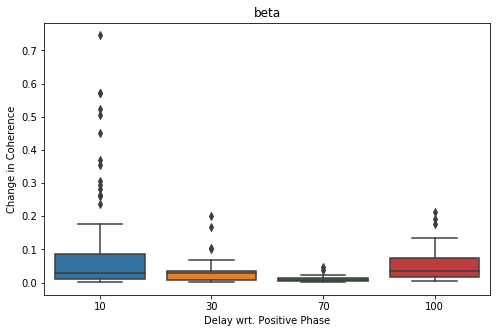

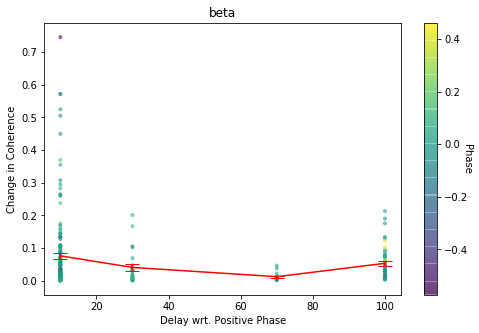

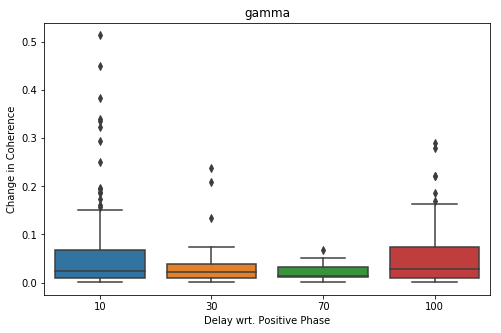

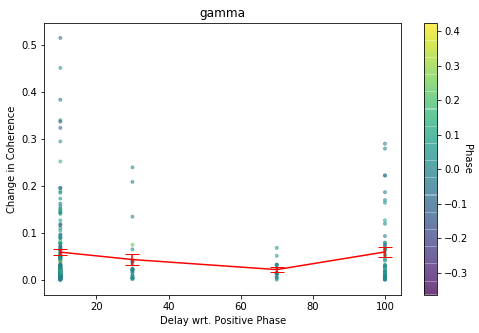

In [11]:
for band in ['delta', 'theta', 'alpha', 'beta', 'gamma']:
    low_f, high_f = get_band_range(band)
    low_f_index, high_f_index = get_freq_band_indices(freqs, low_f, high_f)
    xs = []
    ys = []
    cs = []
    for session in base_stdp_cohs.keys():
        delay = int(paired_stim_experiments[paired_stim_experiments['File Name'].str
                                            .contains(session)].Delay.to_string()[-5:-2])
        coh_changes = np.diff(base_stdp_cohs[session][:, low_f_index:high_f_index].mean(1))
        phis = base_stdp_phis[session][:-1, low_f_index:high_f_index].mean(1)
        for phis_i in range(len(phis)):
            xs.append(delay)
            ys.append(abs(coh_changes[phis_i]))
            cs.append(phis[phis_i])
    df = pd.DataFrame(list(zip(xs, ys)))

    # Boxplot
    sns.boxplot(x=0, y=1, data=df)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()
    
    # Scatter plot of all data and mean, with phase colormap
    plt.scatter(xs, ys, c=cs, s=9, alpha=.5)
    plt.colorbar().set_label('Phase', rotation=270)
    plt.errorbar(df.groupby(0)[0].mean(), df.groupby(0)[1].mean(), yerr=df.groupby(0).sem()[1],
                 c="red", capsize=7)
    plt.title(band)
    plt.xlabel("Delay wrt. Positive Phase")
    plt.ylabel("Change in Coherence")
    plt.show()

## Examine Distribution of Phases:

(5, 644)


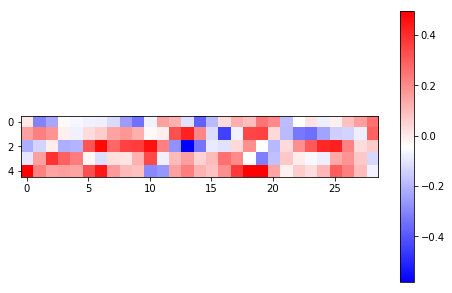

In [12]:
print(base_stdp_phis[session][:-1, low_f_index:high_f_index].shape)
plt.imshow(base_stdp_phis[session][:-1, low_f_index:high_f_index][:, 1:30], cmap='bwr')
plt.colorbar()

### Phasor Plot (still developing):

In [13]:
# for band in ['delta', 'theta', 'alpha', 'beta', 'gamma']:
#     low_f, high_f = get_band_range(band)
#     low_f_index, high_f_index = get_freq_band_indices(freqs, low_f, high_f)
#     single_f = int((low_f_index + high_f_index)/2)
#     xs = []
#     ys = []
#     cs = []
    
#     ax = plt.subplot(111, projection='polar')
    
#     for session in base_stdp_cohs.keys():
#         delay = int(paired_stim_experiments[paired_stim_experiments['File Name'].str
#                                             .contains(session)].Delay.to_string()[-5:-2])
#         coh_changes = np.diff(base_stdp_cohs[session][:, single_f])
#         phis = base_stdp_phis[session][:-1, single_f]
        
#         for phis_i in range(len(phis)):
#             if phis[phis_i] >= 0:
# #                 plt.polar(phis[phis_i], coh_changes[phis_i], c="blue")
#                 ax.plot([0,0], [phis[phis_i], coh_changes[phis_i]], c="blue")
#                 response.append([delay, polar2cart(phis[phis_i], coh_changes[phis_i])])
#             else:
#                 ax.plot([0,0], [phis[phis_i], coh_changes[phis_i]], c="blue")
#                 response.append([-delay, polar2cart(phis[phis_i], coh_changes[phis_i])])
                    
#     df = pd.DataFrame(list(zip(xs, ys)))

    